In [17]:
pip install ucimlrepo

In [18]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

# metadata
print(spambase.metadata)

# variable information
print(spambase.variables)


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert to DataFrame for EDA
spambase_df = pd.DataFrame(X, columns=spambase.variables)
spambase_df['target'] = y






In [20]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Model training: Logistic Regression
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train_scaled, y_train)

# Model evaluation: Logistic Regression
logistic_reg_pred = logistic_reg.predict(X_test_scaled)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_pred)
print("Logistic Regression Accuracy:", logistic_reg_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_reg_pred))


Logistic Regression Accuracy: 0.9196525515743756
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.naive_bayes import GaussianNB

# Model training: Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Model evaluation: Naive Bayes
naive_bayes_pred = naive_bayes.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)
print("\nNaive Bayes Accuracy:", naive_bayes_accuracy)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, naive_bayes_pred))



Naive Bayes Accuracy: 0.8208469055374593
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       531
           1       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Model training: KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Model evaluation: KNN
knn_pred = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("\nK-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)
print("K-Nearest Neighbors (KNN) Classification Report:")
print(classification_report(y_test, knn_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



K-Nearest Neighbors (KNN) Accuracy: 0.8935939196525515
K-Nearest Neighbors (KNN) Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       531
           1       0.90      0.84      0.87       390

    accuracy                           0.89       921
   macro avg       0.89      0.89      0.89       921
weighted avg       0.89      0.89      0.89       921



In [24]:
from sklearn.svm import SVC

# Model training: SVM
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Model evaluation: SVM
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("\nSupport Vector Machine (SVM) Accuracy:", svm_accuracy)
print("Support Vector Machine (SVM) Classification Report:")
print(classification_report(y_test, svm_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Support Vector Machine (SVM) Accuracy: 0.9348534201954397
Support Vector Machine (SVM) Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       531
           1       0.95      0.89      0.92       390

    accuracy                           0.93       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.93      0.93       921



In [25]:
from sklearn.tree import DecisionTreeClassifier

# Model training: Decision Trees
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)

# Model evaluation: Decision Trees
decision_tree_pred = decision_tree.predict(X_test_scaled)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
print("\nDecision Trees Accuracy:", decision_tree_accuracy)
print("Decision Trees Classification Report:")
print(classification_report(y_test, decision_tree_pred))



Decision Trees Accuracy: 0.9001085776330076
Decision Trees Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       531
           1       0.89      0.87      0.88       390

    accuracy                           0.90       921
   macro avg       0.90      0.90      0.90       921
weighted avg       0.90      0.90      0.90       921



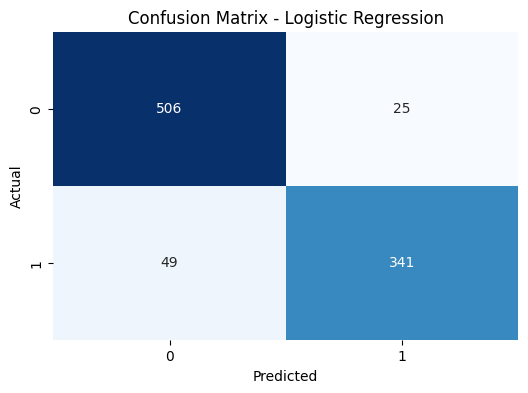

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix: Logistic Regression
logistic_reg_cm = confusion_matrix(y_test, logistic_reg_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(logistic_reg_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


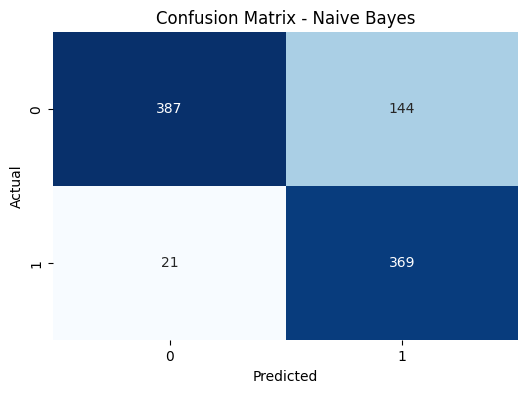

In [27]:
# Confusion Matrix: Naive Bayes
naive_bayes_cm = confusion_matrix(y_test, naive_bayes_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(naive_bayes_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

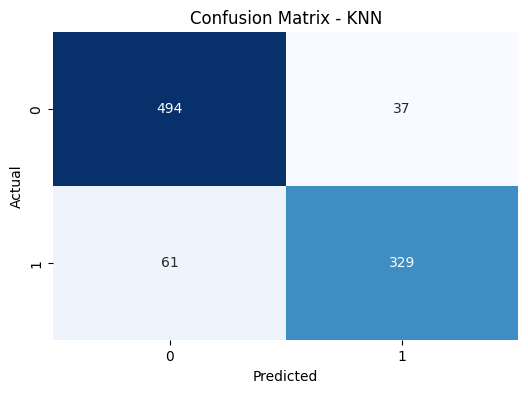

In [28]:
# Confusion Matrix: KNN
knn_cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

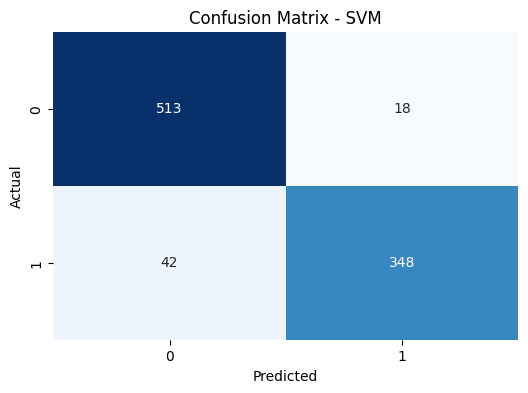

In [29]:
# Confusion Matrix: SVM
svm_cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

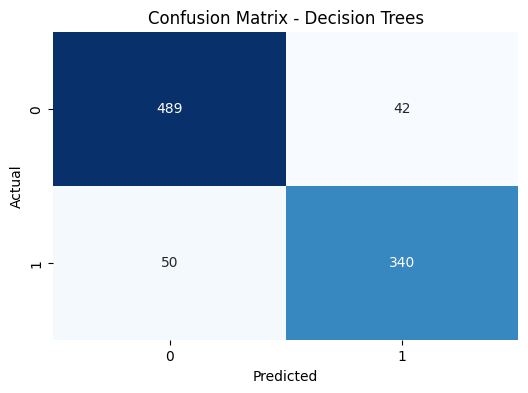

In [30]:
# Confusion Matrix: Decision Trees
decision_tree_cm = confusion_matrix(y_test, decision_tree_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(decision_tree_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Trees')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
import warnings
from sklearn.exceptions import DataConversionWarning

# Ignore warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Logistic Regression with Cross-Validation
logistic_reg_cv_scores = cross_val_score(logistic_reg, X_train_scaled, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", logistic_reg_cv_scores)
print("Mean Accuracy: {:.2f}".format(logistic_reg_cv_scores.mean()))

# Naive Bayes with Cross-Validation
naive_bayes_cv_scores = cross_val_score(naive_bayes, X_train, y_train, cv=5)
print("\nNaive Bayes Cross-Validation Scores:", naive_bayes_cv_scores)
print("Mean Accuracy: {:.2f}".format(naive_bayes_cv_scores.mean()))

# K-Nearest Neighbors (KNN) with Cross-Validation
knn_cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print("\nKNN Cross-Validation Scores:", knn_cv_scores)
print("Mean Accuracy: {:.2f}".format(knn_cv_scores.mean()))

# SVM with Cross-Validation
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print("\nSVM Cross-Validation Scores:", svm_cv_scores)
print("Mean Accuracy: {:.2f}".format(svm_cv_scores.mean()))

# Decision Trees with Cross-Validation
decision_tree_cv_scores = cross_val_score(decision_tree, X_train_scaled, y_train, cv=5)
print("\nDecision Trees Cross-Validation Scores:", decision_tree_cv_scores)
print("Mean Accuracy: {:.2f}".format(decision_tree_cv_scores.mean()))


Logistic Regression Cross-Validation Scores: [0.92798913 0.9048913  0.93070652 0.93206522 0.92527174]
Mean Accuracy: 0.92

Naive Bayes Cross-Validation Scores: [0.82472826 0.79483696 0.81521739 0.83152174 0.82880435]
Mean Accuracy: 0.82

KNN Cross-Validation Scores: [0.9048913  0.89538043 0.91576087 0.90353261 0.90896739]
Mean Accuracy: 0.91

SVM Cross-Validation Scores: [0.93478261 0.9048913  0.94021739 0.9375     0.9361413 ]
Mean Accuracy: 0.93

Decision Trees Cross-Validation Scores: [0.90896739 0.90081522 0.91168478 0.92119565 0.91576087]
Mean Accuracy: 0.91


In [33]:
from sklearn.metrics import roc_auc_score

# Calculate AUC-ROC for Logistic Regression
logistic_reg_auc_roc = roc_auc_score(y_test, logistic_reg_pred)
print("AUC-ROC for Logistic Regression:", logistic_reg_auc_roc)

# Calculate AUC-ROC for Naive Bayes
naive_bayes_auc_roc = roc_auc_score(y_test, naive_bayes_pred)
print("AUC-ROC for Naive Bayes:", naive_bayes_auc_roc)

# Calculate AUC-ROC for KNN
knn_auc_roc = roc_auc_score(y_test, knn_pred)
print("AUC-ROC for KNN:", knn_auc_roc)

# Calculate AUC-ROC for SVM
svm_auc_roc = roc_auc_score(y_test, svm_pred)
print("AUC-ROC for SVM:", svm_auc_roc)

# Calculate AUC-ROC for Decision Trees
decision_tree_auc_roc = roc_auc_score(y_test, decision_tree_pred)
print("AUC-ROC for Decision Trees:", decision_tree_auc_roc)


AUC-ROC for Logistic Regression: 0.9136389975373026
AUC-ROC for Naive Bayes: 0.83748370273794
AUC-ROC for KNN: 0.8869549471244387
AUC-ROC for SVM: 0.9292046936114733
AUC-ROC for Decision Trees: 0.8963494132985658


In [39]:
y_test.sum()

Class    390
dtype: int64

In [38]:
logistic_reg_pred.sum()

366

In [41]:
# Calculate False Positives for Logistic Regression
false_positives_lr = ((y_test.values.ravel() == 0) & (logistic_reg_pred == 1)).sum()
total_non_spam = (y_test.values.ravel() == 0).sum()
false_positive_rate_lr = false_positives_lr / total_non_spam * 100
print("False Positive Rate for Logistic Regression: {:.2f}%".format(false_positive_rate_lr))

# Calculate False Positives for Naive Bayes
false_positives_nb = ((y_test.values.ravel() == 0) & (naive_bayes_pred == 1)).sum()
false_positive_rate_nb = false_positives_nb / total_non_spam * 100
print("False Positive Rate for Naive Bayes: {:.2f}%".format(false_positive_rate_nb))

# Calculate False Positives for KNN
false_positives_knn = ((y_test.values.ravel() == 0) & (knn_pred == 1)).sum()
false_positive_rate_knn = false_positives_knn / total_non_spam * 100
print("False Positive Rate for KNN: {:.2f}%".format(false_positive_rate_knn))

# Calculate False Positives for SVM
false_positives_svm = ((y_test.values.ravel() == 0) & (svm_pred == 1)).sum()
false_positive_rate_svm = false_positives_svm / total_non_spam * 100
print("False Positive Rate for SVM: {:.2f}%".format(false_positive_rate_svm))

# Calculate False Positives for Decision Trees
false_positives_dt = ((y_test.values.ravel() == 0) & (decision_tree_pred == 1)).sum()
false_positive_rate_dt = false_positives_dt / total_non_spam * 100
print("False Positive Rate for Decision Trees: {:.2f}%".format(false_positive_rate_dt))


False Positive Rate for Logistic Regression: 4.71%
False Positive Rate for Naive Bayes: 27.12%
False Positive Rate for KNN: 6.97%
False Positive Rate for SVM: 3.39%
False Positive Rate for Decision Trees: 7.91%
